<a href="https://colab.research.google.com/github/yashlad27/LSTM_basics/blob/main/Stock_Market_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [11]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates

from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [12]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [13]:
from google.colab import files
uploaded = files.upload()

Saving MSFT.csv to MSFT (1).csv


In [14]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['MSFT.csv']))

In [15]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [19]:
# check for null values 
print("Dataframe shape: ", df2.shape)
print("Null values present: ", df2.isnull().values.any())

Dataframe shape:  (9083, 7)
Null values present:  False


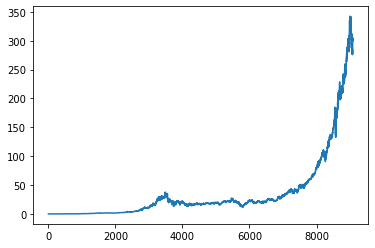

In [20]:
# adjusted close value: 
# final output value that will be forecasted 

df2["Adj Close"].plot()

In [21]:
# Setting the Target Variable and Selecting the Features:

# 1. Target
output_var = pd.DataFrame(df2['Adj Close'])

# features:
features = ['Open', 'High', 'Low', 'Volume']

In [22]:
# Scaling:

scalar = MinMaxScaler()
feature_transform = scalar.fit_transform(df2[features])

feature_transform = pd.DataFrame(columns=features, 
                                 data=feature_transform,
                                 index=df2.index)

feature_transform.head()

,Open,High,Low,Volume
0,0.000000,0.000027,0.000000,1.000000
1,0.000025,0.000030,0.000025,0.297096
2,0.000035,0.000032,0.000036,0.127119
3,0.000040,0.000032,0.000030,0.063588
4,0.000033,0.000025,0.000025,0.044285


In [25]:
# Training and Testing data set for model:

timesplit = TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(feature_transform):
  X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
  y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index):(len(train_index)+len(test_index))].values.ravel()


In [26]:
# DataPreprocessing from LSTM
trainX = np.array(X_train)
testX = np.array(X_test)

X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

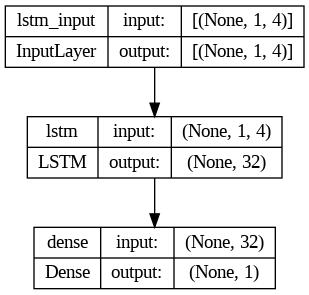

In [27]:
# Building the LSTM Model for Stock Market Prediction

lstm = Sequential()

lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [28]:
# training the stock market prediction model:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1033/1033 [==============================] - 6s 3ms/step - loss: 54.7049
Epoch 2/100
1033/1033 [==============================] - 3s 2ms/step - loss: 211.0509
Epoch 3/100
1033/1033 [==============================] - 3s 3ms/step - loss: 124.9409
Epoch 4/100
1033/1033 [==============================] - 3s 3ms/step - loss: 63.0289
Epoch 5/100
1033/1033 [==============================] - 4s 3ms/step - loss: 27.0159
Epoch 6/100
1033/1033 [==============================] - 3s 3ms/step - loss: 9.3733
Epoch 7/100
1033/1033 [==============================] - 3s 2ms/step - loss: 3.5001
Epoch 8/100
1033/1033 [==============================] - 3s 2ms/step - loss: 1.9576
Epoch 9/100
1033/1033 [==============================] - 3s 3ms/step - loss: 1.3777
Epoch 10/100
1033/1033 [==============================] - 3s 3ms/step - loss: 1.0680
Epoch 11/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8981
Epoch 12/100
1033/1033 [==============================] - 3s 3ms/st

In [29]:
# LSTM_Prediction:
y_pred = lstm.predict(X_test)

26/26 [==============================] - 2s 5ms/step


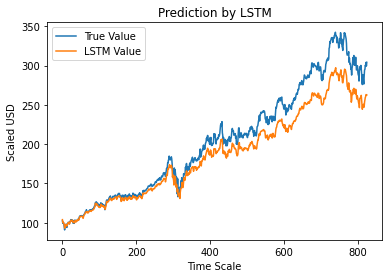

In [31]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()